In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import analyze_cells_energy as ace
import re
import utils
import itertools
import seaborn as sns
import utils_PLS as upls

In [2]:
# load query file where we added volumes for each area
volumes = ace.clean_volumes_database()

In [7]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'WILD_with_father'
batch='WILD_with_father2500'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_with_father2500_newwild.npy', 
                                   allow_pickle=True).item()

In [4]:
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, volumes=volumes)

# Format data for task PLS

In [5]:
data_ncells = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                   batch=batch, table='n_cells')
data_energy = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                   batch=batch, table='energy')
data_density = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                    batch=batch, table='density')
data_relative_density = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                             batch=batch, table='relative_density')
data_ncells.dropna(inplace=True, axis=1)
data_energy.dropna(inplace=True, axis=1)
data_density.dropna(inplace=True, axis=1)
data_relative_density.dropna(inplace=True, axis=1)
data_ncells.to_csv('./results_pls/'+batch+'_n_cells.csv')
data_energy.to_csv('./results_pls/'+batch+'_energy.csv')
data_density.to_csv('./results_pls/'+batch+'_density.csv')
data_relative_density.to_csv('./results_pls/'+batch+'_relative_density.csv')

# Format data for hierarchy plotting

In [18]:
df_levels = upls.create_df_levels(volumes)

# Apply task PLS

In [7]:
%%bash
python area_pls.py -i results_pls/WILD_with_father2500_n_cells.csv -o './results_pls/WILD_with_father2500_ncells'

In [8]:
%%bash
python area_pls.py -i results_pls/WILD_with_father2500_energy.csv -o './results_pls/WILD_with_father2500_energy'

In [9]:
%%bash
python area_pls.py -i results_pls/WILD_with_father2500_density.csv -o './results_pls/WILD_with_father2500_density'

In [10]:
%%bash
python area_pls.py -i results_pls/WILD_with_father2500_relative_density.csv -o './results_pls/WILD_with_father2500_relative_density'

# PLS ncells

In [11]:
contrasts = pd.read_csv('./results_pls/WILD_with_father_contrasts.csv')
saliences = pd.read_csv('./results_pls/WILD_with_father_saliences.csv')
contrasts = contrasts.rename(columns={"group_Control": "Control", "group_Fam": "Fam", "group_Unfam":"Unfam"})

(<Figure size 936x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'First salience'}, ylabel='z-score(salience)'>,
        <AxesSubplot:title={'center':'Second salience'}, ylabel='z-score(salience)'>,
        <AxesSubplot:title={'center':'Third salience'}, xlabel='Area', ylabel='z-score(salience)'>],
       dtype=object))

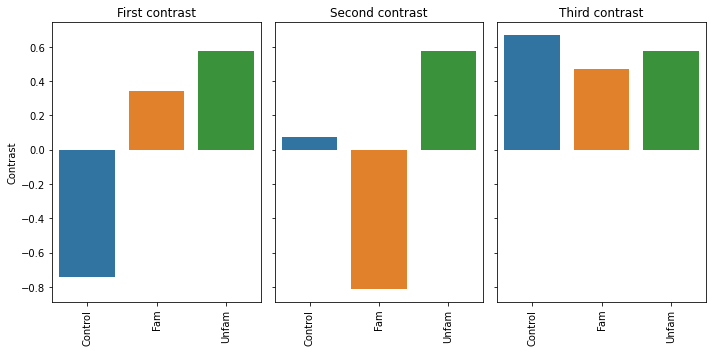

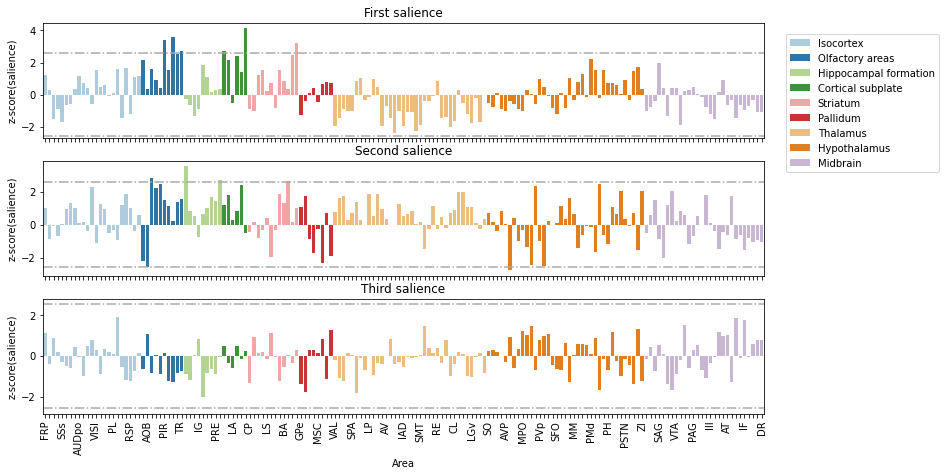

In [12]:
upls.plot_panel_contrasts(batch=batch, variable='ncells')
upls.plot_panel_saliences(batch=batch, variable='ncells', df_levels=df_levels)

# PLS energy

(<Figure size 936x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'First salience'}, ylabel='z-score(salience)'>,
        <AxesSubplot:title={'center':'Second salience'}, ylabel='z-score(salience)'>,
        <AxesSubplot:title={'center':'Third salience'}, xlabel='Area', ylabel='z-score(salience)'>],
       dtype=object))

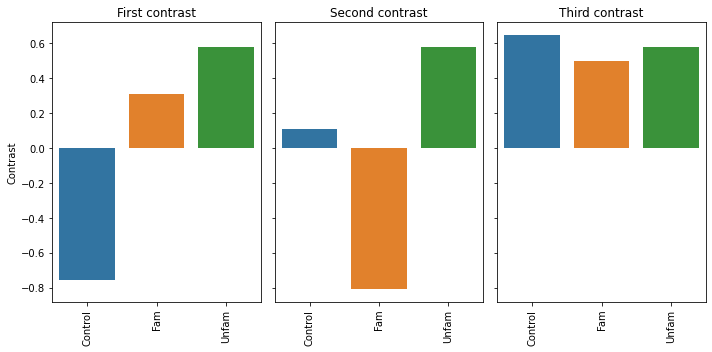

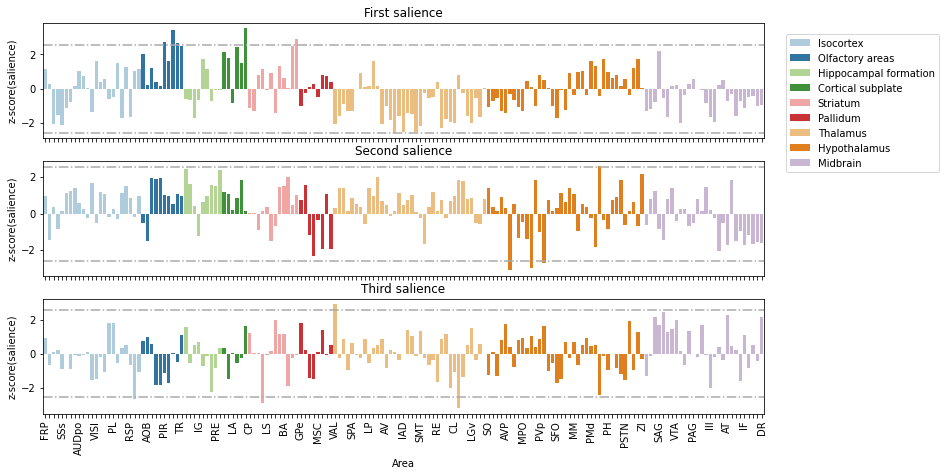

In [13]:
upls.plot_panel_contrasts(batch=batch, variable='energy')
upls.plot_panel_saliences(batch=batch, variable='energy', df_levels=df_levels)

# PLS density

(<Figure size 936x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'First salience'}, ylabel='z-score(salience)'>,
        <AxesSubplot:title={'center':'Second salience'}, ylabel='z-score(salience)'>,
        <AxesSubplot:title={'center':'Third salience'}, xlabel='Area', ylabel='z-score(salience)'>],
       dtype=object))

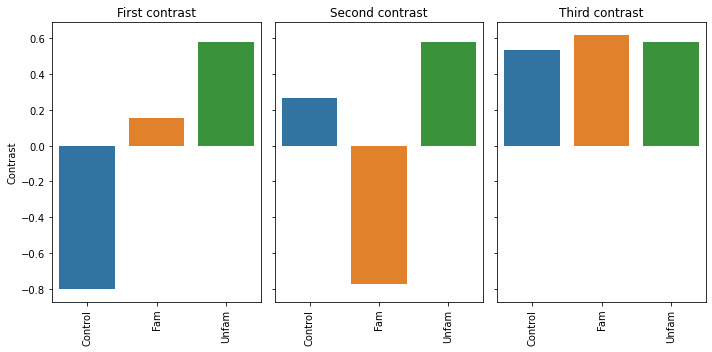

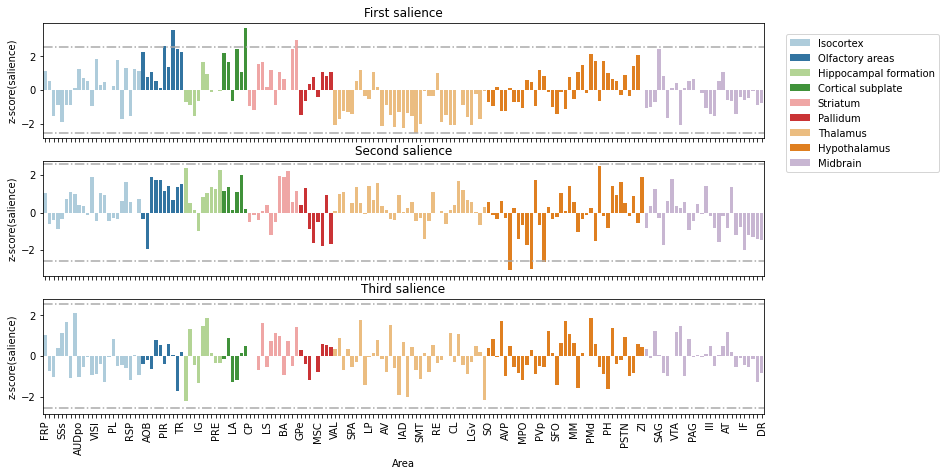

In [14]:
upls.plot_panel_contrasts(batch=batch, variable='density')
upls.plot_panel_saliences(batch=batch, variable='density', df_levels=df_levels)

# PLS relative density

(<Figure size 936x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'First salience'}, ylabel='z-score(salience)'>,
        <AxesSubplot:title={'center':'Second salience'}, ylabel='z-score(salience)'>,
        <AxesSubplot:title={'center':'Third salience'}, xlabel='Area', ylabel='z-score(salience)'>],
       dtype=object))

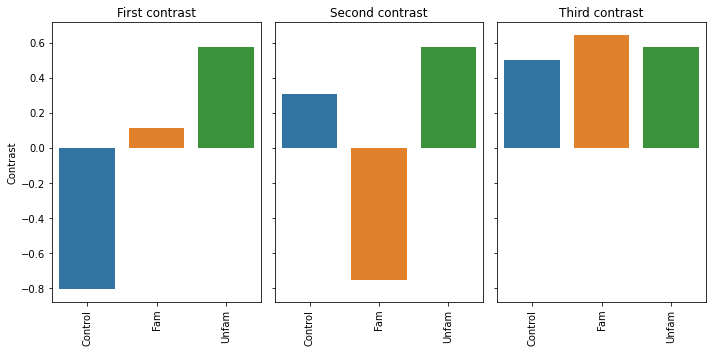

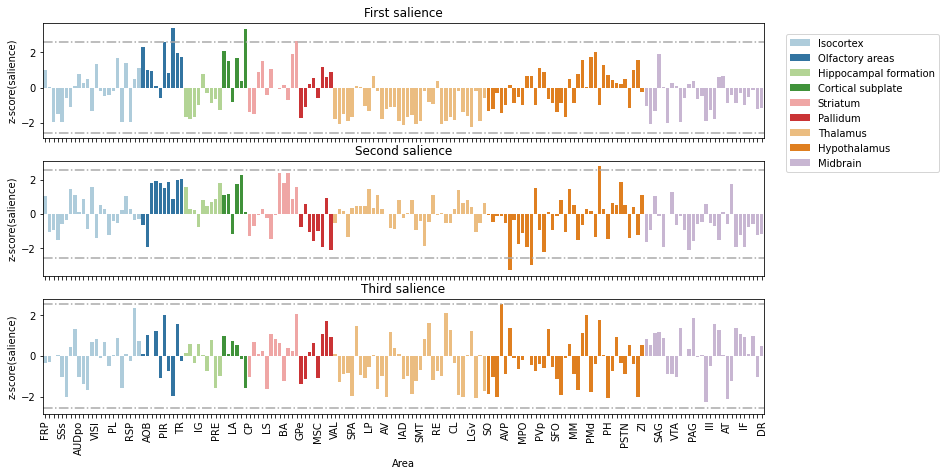

In [15]:
upls.plot_panel_contrasts(batch=batch, variable='relative_density')
upls.plot_panel_saliences(batch=batch, variable='relative_density', df_levels=df_levels)

# Identify areas with significant area contribution

In [16]:
pls_sig_areas = upls.identify_pls_sig_areas(saliences=saliences, 
                                       threshold=2.57, 
                                       volumes=volumes)
np.save('results_pls/pls_sig_areas_WILD_with_father.npy', pls_sig_areas)

In [17]:
pls_sig_areas = np.load('results_pls/pls_sig_areas_WILD_with_father.npy', allow_pickle=True)
pls_sig_areas

array(["Ammon's horn", 'Anteromedial visual area', 'Claustrum',
       'Cortical amygdalar area', 'Endopiriform nucleus',
       'Medial amygdalar nucleus', 'Olfactory tubercle',
       'Paraventricular hypothalamic nucleus descending division',
       'Piriform area', 'Posterior amygdalar nucleus',
       'Postpiriform transition area', 'Pretectal region'], dtype='<U56')

In [18]:
overlap = {'ncells':[], 'energy':[], 'density':[], 'relative_density':[]}
for variable in overlap.keys():
    overlap[variable] = set(upls.identify_pls_sig_areas(saliences=pd.read_csv(
        './results_pls/'+ batch +'_'+ variable +'_saliences.csv'), 
                                           threshold=2.57, 
                                           volumes=volumes))
[len(overlap[key]) for key in overlap.keys()]

[11, 13, 7, 7]

In [19]:
overlap['relative_density']

{'Anteroventral periventricular nucleus',
 'Cortical amygdalar area',
 'Medial amygdalar nucleus',
 'Paraventricular hypothalamic nucleus descending division',
 'Piriform area',
 'Posterior amygdalar nucleus',
 'Posterodorsal preoptic nucleus'}

In [20]:
# union between areas significant in all analyses
all_areas = overlap['ncells'].union(overlap['energy']).union(overlap['density']).union(overlap['relative_density'])
# intersection between areas significant in all analyses
intersection = overlap['ncells'].intersection(overlap['energy']).intersection(
    overlap['density']).intersection(overlap['relative_density'])
# filtering
intersection, len(intersection)

({'Anteroventral periventricular nucleus',
  'Cortical amygdalar area',
  'Medial amygdalar nucleus',
  'Piriform area',
  'Posterior amygdalar nucleus'},
 5)

In [21]:
overlap['relative_density']

{'Anteroventral periventricular nucleus',
 'Cortical amygdalar area',
 'Medial amygdalar nucleus',
 'Paraventricular hypothalamic nucleus descending division',
 'Piriform area',
 'Posterior amygdalar nucleus',
 'Posterodorsal preoptic nucleus'}

In [22]:
subjects = list(dict_results_across_mice.keys())
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')
df_ttest_ncells = ace.test_across_groups([df_control_cell_count,df_fam_cell_count,df_unfam_cell_count])
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_ncells = df_ttest_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])
set(df_ttest_ncells[df_ttest_ncells['pval_Control_vs_Fam']<0.05]['area'].values).union(
set(df_ttest_ncells[df_ttest_ncells['pval_Control_vs_Unfam']<0.05]['area'].values)).union(
set(df_ttest_ncells[df_ttest_ncells['pval_Fam_vs_Unfam']<0.05]['area'].values))

{"Ammon's horn",
 'Basolateral amygdalar nucleus',
 'Claustrum',
 'Cortical amygdalar area',
 'Intercalated amygdalar nucleus',
 'Medial amygdalar nucleus',
 'Nucleus sagulum',
 'Piriform area',
 'Piriform-amygdalar area',
 'Posterior amygdalar nucleus',
 'Postpiriform transition area',
 'Septofimbrial nucleus',
 'Triangular nucleus of septum',
 'Ventral premammillary nucleus'}

In [23]:
overlap['relative_density'].intersection(set(df_ttest_ncells[df_ttest_ncells['pval_Control_vs_Fam']<0.05]['area'].values).union(
set(df_ttest_ncells[df_ttest_ncells['pval_Control_vs_Unfam']<0.05]['area'].values)).union(
set(df_ttest_ncells[df_ttest_ncells['pval_Fam_vs_Unfam']<0.05]['area'].values)))

{'Cortical amygdalar area',
 'Medial amygdalar nucleus',
 'Piriform area',
 'Posterior amygdalar nucleus'}

In [24]:
pls_sig_areas = upls.identify_pls_sig_areas(saliences=saliences, 
                                       threshold=2.57, 
                                       volumes=volumes)
np.save('results_pls/pls_sig_areas__fatherWILD_with.npy', pls_sig_areas)

# Only two groups: test fam vs unfam

In [21]:
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_with_father2500_newwild.npy', 
                                   allow_pickle=True).item()
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, volumes=volumes)
subject = list(dict_results_across_mice.keys())
experimental_groups = utils.divide_in_exp_groups(list_subjects=list(dict_results_across_mice.keys()))

In [22]:
for ctrl in experimental_groups['Unfam']:
    del dict_results_across_mice[ctrl]

In [23]:
batch = 'wild_wf_ctrl_vs_fam'
data_ncells = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                   batch=batch, table='n_cells')
data_energy = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                   batch=batch, table='energy')
data_density = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                    batch=batch, table='density')
data_relative_density = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                             batch=batch, table='relative_density')
data_ncells.dropna(inplace=True, axis=1)
data_energy.dropna(inplace=True, axis=1)
data_density.dropna(inplace=True, axis=1)
data_relative_density.dropna(inplace=True, axis=1)
data_ncells.to_csv('./results_pls/'+batch+'_n_cells.csv')
data_energy.to_csv('./results_pls/'+batch+'_energy.csv')
data_density.to_csv('./results_pls/'+batch+'_density.csv')
data_relative_density.to_csv('./results_pls/'+batch+'_relative_density.csv')

In [24]:
%%bash
python area_pls.py -i results_pls/wild_wf_ctrl_vs_fam_relative_density.csv -o './results_pls/wild_wf_ctrl_vs_fam_relative_density'

In [25]:
def plot_panel_contrasts(batch, variable, palette='tab10'):
    contrasts = pd.read_csv('./results_pls/'+ batch +'_'+ variable +'_contrasts.csv')
    contrasts = contrasts.rename(columns={"group_Control": "Control", 
                                                  "group_Fam": "Fam", 
                                                  "group_Unfam":"Unfam"})
    contrasts = contrasts.rename(columns={"group_observer": "observer", 
                                                  "group_demonstrator": "demonstrator", 
                                                  "group_noshock":"noshock"})
    fig, axes = plt.subplots(1,2, sharey='row', figsize=(10,5))
    titles = ['First contrast',
             'Second contrast',
             'Third contrast']
    for i in range(2):
        upls.plot_contrasts(df_data=contrasts, index=i, ax=axes[i], palette=palette)
        axes[i].tick_params(axis='x', labelrotation=90)
        axes[i].set_title(titles[i])
        axes[i].set_ylabel('Contrast') if i==0 else axes[i].set_ylabel('')
        axes[i].set(xlabel=None)
    plt.tight_layout()
    return fig, axes

(<Figure size 720x360 with 2 Axes>,
 array([<AxesSubplot:title={'center':'First contrast'}, ylabel='Contrast'>,
        <AxesSubplot:title={'center':'Second contrast'}>], dtype=object))

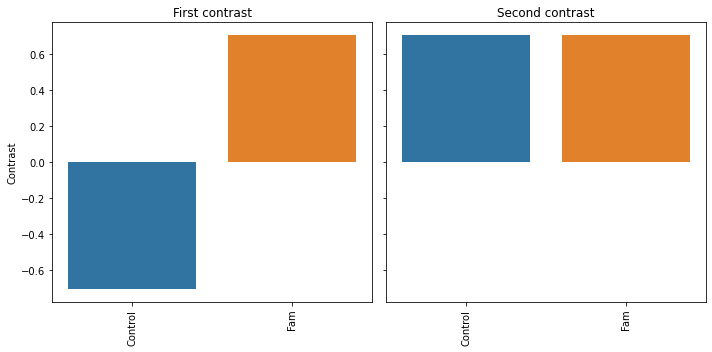

In [26]:
plot_panel_contrasts(batch=batch, variable='relative_density')

In [27]:
def plot_panel_saliences(batch, variable, df_levels, palette=sns.color_palette("Paired")):
    saliences = pd.read_csv('./results_pls/'+ batch +'_'+ variable +'_saliences.csv')
    fig, axes = plt.subplots(2,1, sharex='row', figsize=(13,7))
    plt.subplots_adjust(top=0.9, left=0.03, right=0.8)
    titles = ['First salience',
         'Second salience',
         'Third salience']
    n = 4  # Keeps every 7th label
    for i in range(2):
        upls.plot_saliences(df_data=saliences, index=i, ax=axes[i], 
                       df_levels=df_levels, palette=palette)
        axes[i].tick_params(axis='x', labelrotation=90)
        axes[i].axhline(y=2.57, linestyle='-.', color='darkgrey')
        axes[i].axhline(y=-2.57, linestyle='-.', color='darkgrey')
        [l.set_visible(False) for (i,l) in enumerate(axes[i].xaxis.get_ticklabels()) if i % n != 0]
        axes[i].set_title(titles[i])
        axes[i].set_ylabel('z-score(salience)')
        if i!=1:
            axes[i].set_xlabel('')
            axes[i].set(xticklabels=[])
    axes[1].set_xlabel('Area')
    axes[0].legend(loc='right', bbox_to_anchor=(1.25,0.3))
    axes[1].get_legend().remove()
    return fig, axes
    

(<Figure size 936x504 with 2 Axes>,
 array([<AxesSubplot:title={'center':'First salience'}, ylabel='z-score(salience)'>,
        <AxesSubplot:title={'center':'Second salience'}, xlabel='Area', ylabel='z-score(salience)'>],
       dtype=object))

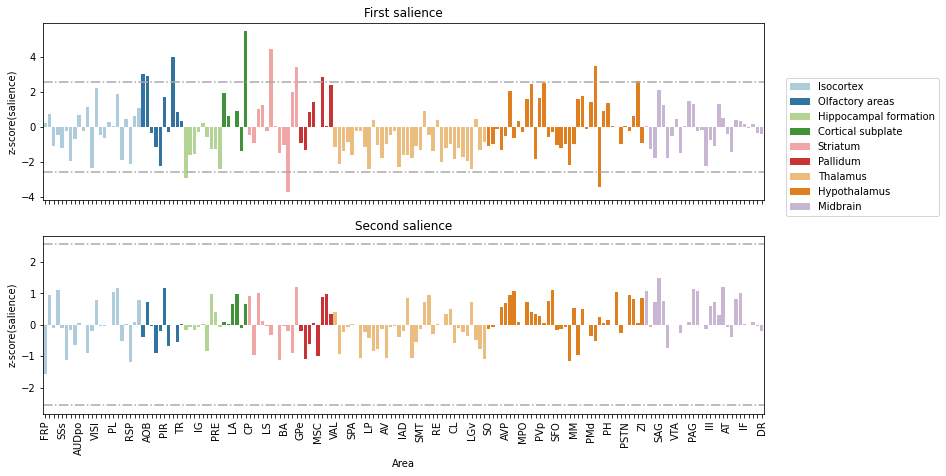

In [28]:
plot_panel_saliences(batch=batch, variable='relative_density', df_levels=df_levels)

In [29]:
variable='relative_density'
upls.identify_pls_sig_areas(saliences=pd.read_csv(
        './results_pls/'+ batch +'_'+ variable +'_saliences.csv'), 
                                           threshold=2.56, 
                                           volumes=volumes)

array(['Accessory olfactory bulb', "Ammon's horn",
       'Central amygdalar nucleus', 'Cortical amygdalar area',
       'Main olfactory bulb', 'Medial amygdalar nucleus',
       'Paraventricular hypothalamic nucleus descending division',
       'Posterior amygdalar nucleus', 'Septofimbrial nucleus',
       'Triangular nucleus of septum', 'Tuberal nucleus',
       'Ventral premammillary nucleus'], dtype='<U56')